In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import glob

from emu_yt_module import EmuDataset

In [2]:
#filename = "/global/project/projectdirs/m3018/Emu/PAPER/1D/converge_nx/1D_nx4096/plt09560"
filename = "/global/project/projectdirs/m3018/Emu/PAPER/1D/converge_domain/1D_512cm/plt04840"

In [3]:
ds = EmuDataset(filename)

yt : [INFO     ] 2020-12-28 22:03:54,475 Parameters: current_time              = 4.995210859995128e-09
yt : [INFO     ] 2020-12-28 22:03:54,476 Parameters: domain_dimensions         = [   1    1 8192]
yt : [INFO     ] 2020-12-28 22:03:54,477 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-28 22:03:54,478 Parameters: domain_right_edge         = [  1.   1. 512.]
/global/project/projectdirs/m3018/Emu/PAPER/scripts/emu_yt_module.py:102: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  self.ds.add_field(("gas", "trace"), function=_trace, units="auto", dimensions=dimensions.dimensionless)
/global/project/projectdirs/m3018/Emu/PAPER/scripts/emu_yt_module.py:116: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  self.ds.add_field(("gas", fname_norm), function=_norm_derived_f, units="auto", dimensions=dimensions.dimensionless)


In [4]:
def moving_average(x, width):
    return np.convolve(x, np.ones(width), 'valid') / width

In [5]:
def plot(kz, ft, label=None, ylabel=None):
    label_wavenumbers = [-5.0, 5.0]

    fig, ax = plt.subplots()
    ax.plot(kz * (2*np.pi), ft)
    ax.set_xlim([-10, 10])
    ax.set_xlabel("k")
    for w in label_wavenumbers:
        plt.axvline(x=w, color='green')
        plt.text(w*1.1, 0, "{}".format(w), rotation=90, color='green')
        
    if label:
        plt.text(0.75, 0.75, label, transform=ax.transAxes)
        
    if ylabel:
        ax.set_ylabel(ylabel)
        
    plt.tight_layout()
    plt.savefig("{}_{}.png".format(label, ylabel))

yt : [WARNING  ] 2020-12-28 22:03:54,942 Field ('gas', 'trace') was added without specifying units, assuming units are dimensionless
yt : [WARNING  ] 2020-12-28 22:03:54,943 Field ('gas', 'Fx01_Re_norm_tr') was added without specifying units, assuming units are dimensionless
yt : [WARNING  ] 2020-12-28 22:03:54,946 Field ('gas', 'Fx01_Im_norm_tr') was added without specifying units, assuming units are dimensionless


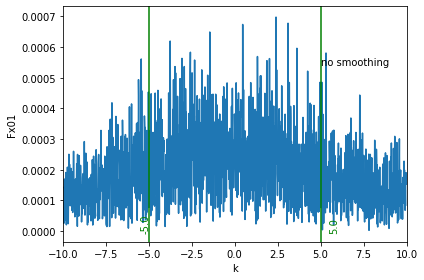

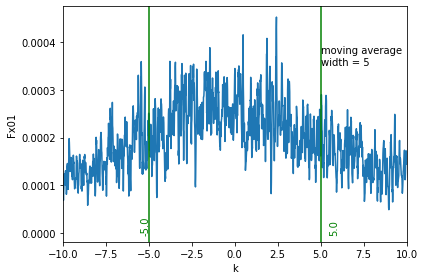

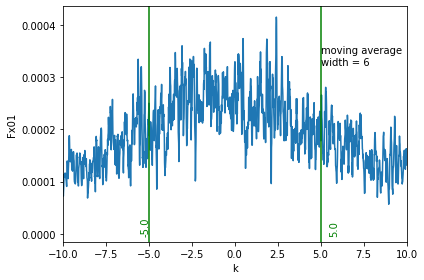

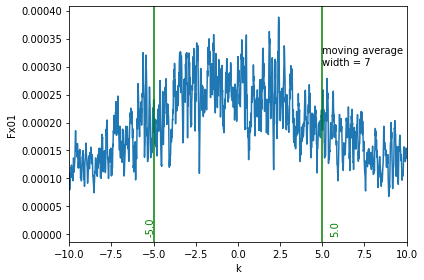

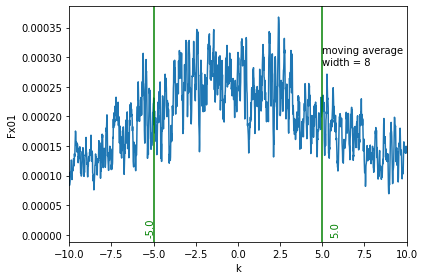

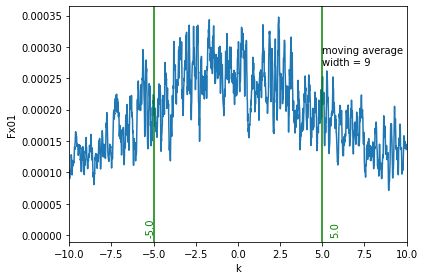

In [6]:
(kx, ky, kz), fn01 = ds.fourier("Fx01_Re_norm_tr", "Fx01_Im_norm_tr")

plot(kz, fn01, "no smoothing", ylabel="Fx01")

for w in range(5, 10):
    k = moving_average(kz, w)
    f = moving_average(fn01, w)
    plot(k, f, "moving average\nwidth = {}".format(w), ylabel="Fx01")